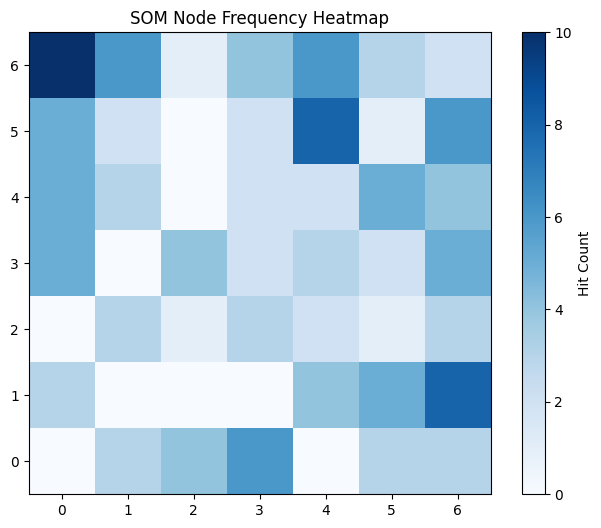

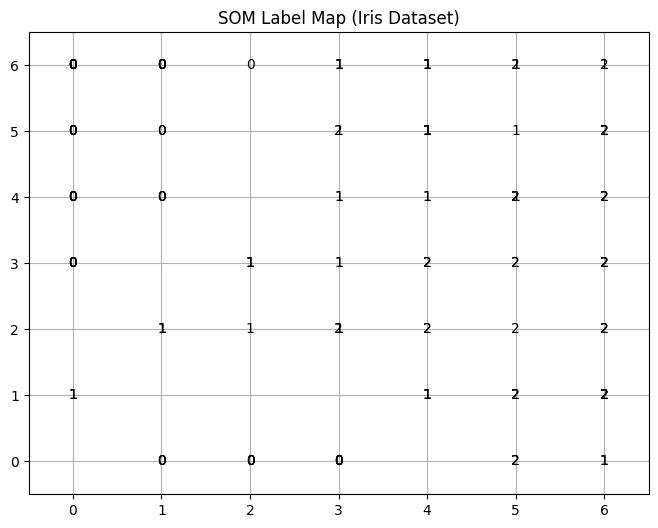

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
from minisom import MiniSom

data = load_iris()
X = data.data
y = data.target

X_scaled = MinMaxScaler().fit_transform(X)

som = MiniSom(7, 7, X.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(X_scaled)
som.train_random(X_scaled, 1000)

freq = np.zeros((7,7))
for x in X_scaled:
    i, j = som.winner(x)
    freq[i, j] += 1

plt.figure(figsize=(8,6))
plt.imshow(freq.T, origin='lower', cmap='Blues')
plt.colorbar(label="Hit Count")
plt.title("SOM Node Frequency Heatmap")
plt.show()

plt.figure(figsize=(8,6))
for idx, x in enumerate(X_scaled):
    i, j = som.winner(x)
    plt.text(i, j, str(y[idx]),
             ha='center', va='center'
    )

plt.xlim(-0.5, 6.5)
plt.ylim(-0.5, 6.5)
plt.grid()
plt.title("SOM Label Map (Iris Dataset)")
plt.show()